Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning", padding: 15px">
<strong>Комментарий студента:</strong>
    Привет! Меня зовут Александр, приятно познакомиться! Буду рад улучшить свою работу с твоей помощью.
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Для добывающей компании требуется обучить модель для выбора локации бурения скважины.
Для этого будут исследованы 3 различных региона добычи, для каждого была обучены наборы моделей.
Перед исследованием требуется провести работу над входными данными - разделение на выборки и последующая нормализация.
Затем нужно построить модели для предсказания объёма запасов в новых скважинах и на этих предсказаниях отобрать скважины с самыми высокими оценками значений.
В конце концов оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

### Загрузка данных

Чтобы подготовить модели оценки объёма запасов нефти в скважине необходимо изучить и переработать данные.
Для реализации модели линейной регрессии необходимо нормализовать данные, чтобы большие значения не перекрывали малые.

In [69]:
import numpy as np
import pandas as pd
import pylab as pl
import warnings
import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy import stats as st

from sklearn.ensemble import RandomForestRegressor
from sklearn.exceptions import DataConversionWarning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [70]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [71]:
try:
    df0 = pd.read_csv('/datasets/geo_data_0.csv')
    df1 = pd.read_csv('/datasets/geo_data_1.csv')
    df2 = pd.read_csv('/datasets/geo_data_2.csv')
except Exception as info:
    display(info)
    df0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

In [72]:
def describe_dataframe(dataframe):
    display(dataframe.head(10))
    display(dataframe.info())
    display(dataframe.describe(percentiles=[.5]).T)
    print(f"Количество дублированных строк: {dataframe.duplicated().sum()}")

### Первый датафрейм.

In [73]:
describe_dataframe(df0)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,count,mean,std,min,50%,max
f0,100000.0,0.500419,0.871832,-1.408605,0.502360,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,0.250252,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,2.515969,16.003790
product,100000.0,92.500000,44.288691,0.000000,91.849972,185.364347


Количество дублированных строк: 0


Для дальнейшей работы необходимо будет перенести категориальное значение id в index датафрейма, т.к. это и есть индекс скважины, отдельное числовое представление индекса излишне.

In [74]:
features_0 = df0[["f0", "f1", "f2"]]
features_0.index = df0['id']
target_0 = df0['product']
target_0.index = df0['id']

Разделим данные на валидационную и тестовую выборки.

Text(0, 0.5, 'Количество скважин')

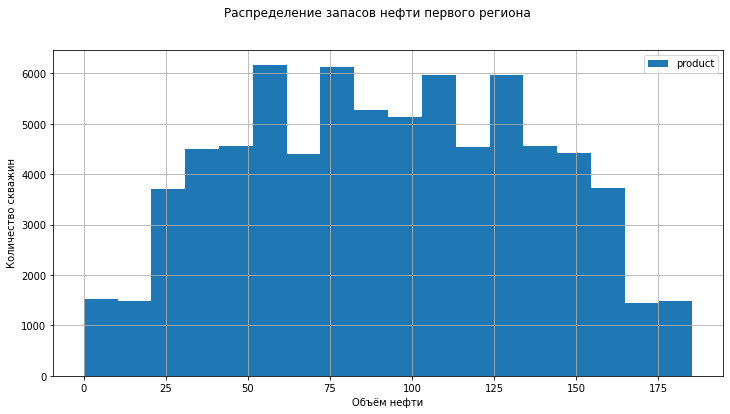

In [75]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=.25, random_state=32123)
fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
hist0 = target_train_0.hist(
    bins=18,
    legend=True,
)
pl.suptitle("Распределение запасов нефти первого региона")
hist0.set_xlabel("Объём нефти")
hist0.set_ylabel("Количество скважин")

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Изменён масштаб графика, добавлены подписи осей и название.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

Объёмы нефти в скважинах первого региона распределены нормально.

In [76]:
f"Среднее значение запаса нефти в скважине: {target_train_0.mean(): .3} тыс. баррелей"

'Среднее значение запаса нефти в скважине:  92.5 тыс. баррелей'

Нормализуем данные для более точного подбора параметров моделей.

In [77]:
scaler = StandardScaler()
scaler.fit(features_train_0)
features_train_0 = pd.DataFrame(
    scaler.transform(features_train_0),
    columns=features_train_0.columns,
    index=features_train_0.index)
features_valid_0 = pd.DataFrame(
    scaler.transform(features_valid_0),
    columns=features_valid_0.columns,
    index=features_valid_0.index)

describe_dataframe(features_train_0)

,f0,f1,f2
id,,,
y02ny,-1.146059,1.251477,-0.212471
y1cQO,0.319854,0.572784,-0.872745
xu1gI,0.937027,-1.207503,-0.878044
33mI5,-0.564041,-0.027369,0.106684
u8EYd,-0.602662,1.576371,0.247156
1Uatn,1.191606,-1.117558,0.996478
fD1V9,0.519331,0.221111,-0.264934
pEj03,-0.575704,-0.500024,-0.298915
2ocEN,1.015977,-0.953444,-0.577819


<class 'pandas.core.frame.DataFrame'>
Index: 75000 entries, y02ny to rmNUx
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      75000 non-null  float64
 1   f1      75000 non-null  float64
 2   f2      75000 non-null  float64
dtypes: float64(3)
memory usage: 2.3+ MB


None

,count,mean,std,min,50%,max
f0,75000.0,-1.293188e-17,1.000007,-2.189475,0.001634,2.139736
f1,75000.0,-1.200107e-16,1.000007,-2.170048,-0.000597,2.147799
f2,75000.0,-9.350742e-17,1.000007,-4.501229,0.003254,3.985619


Количество дублированных строк: 0


Повторим процедуру для двух других датафреймов.

### Второй датафрейм

In [78]:
describe_dataframe(df1)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,count,mean,std,min,50%,max
f0,100000.0,1.141296,8.965932,-31.609576,1.153055,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-4.813172,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,2.011479,5.019721
product,100000.0,68.825000,45.944423,0.000000,57.085625,137.945408


Количество дублированных строк: 0


In [79]:
features_1 = df1[["f0", "f1", "f2"]]
features_1.index = df1['id']
target_1 = df1['product']
target_1.index = df1['id']

Text(0, 0.5, 'Количество скважин')

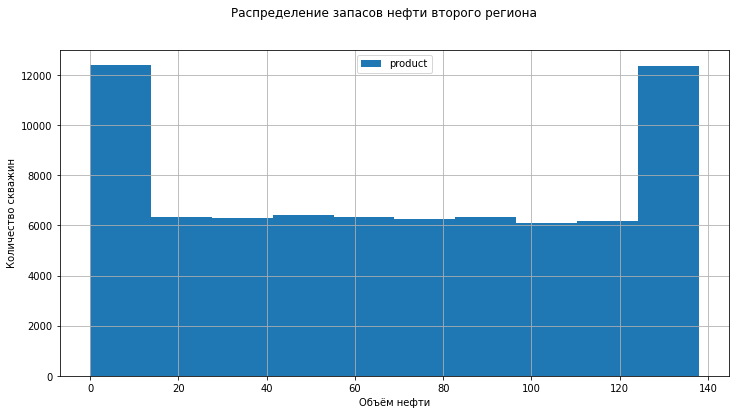

In [80]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=.25, random_state=32123)
fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
hist1 = target_train_1.hist(
    legend=True
)
pl.suptitle("Распределение запасов нефти второго региона")
hist1.set_xlabel("Объём нефти")
hist1.set_ylabel("Количество скважин")

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Изменён масштаб графика, добавлены подписи осей и название.
</div>

Объёмы нефти в скважинах второго региона не имеют внятного распределения.

In [81]:
f"Среднее значение запаса нефти в скважине: {target_train_1.mean(): .3} тыс. баррелей"

'Среднее значение запаса нефти в скважине:  68.7 тыс. баррелей'

In [82]:
scaler = StandardScaler()
scaler.fit(features_train_1)
features_train_1 = pd.DataFrame(
    scaler.transform(features_train_1),
    columns=features_train_1.columns,
    index=features_train_1.index)
features_valid_1 = pd.DataFrame(
    scaler.transform(features_valid_1),
    columns=features_valid_1.columns,
    index=features_valid_1.index)

describe_dataframe(features_train_1)

,f0,f1,f2
id,,,
tDtY5,0.733016,-0.390459,-0.878137
Vhtai,-1.284234,-0.644242,1.469057
vBoCO,-0.510115,1.089749,-0.291124
SfMWv,-0.698701,-1.017410,0.890288
15Cyr,0.372528,0.686589,-0.874524
vXIIz,-0.587659,1.621120,-0.875472
PlmwS,-0.876600,-1.509598,-0.289920
mBtS8,0.440508,-0.027724,0.299857
6OtSo,-1.353175,-0.451031,0.298020


<class 'pandas.core.frame.DataFrame'>
Index: 75000 entries, tDtY5 to 6EWAz
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      75000 non-null  float64
 1   f1      75000 non-null  float64
 2   f2      75000 non-null  float64
dtypes: float64(3)
memory usage: 2.3+ MB


None

,count,mean,std,min,50%,max
f0,75000.0,2.349528e-17,1.000007,-3.653487,0.001707,3.155470
f1,75000.0,-5.565918e-17,1.000007,-4.210532,-0.004845,4.595829
f2,75000.0,-6.892265e-17,1.000007,-1.474743,-0.282490,1.486010


Количество дублированных строк: 0


### Третий датафрейм

In [83]:
describe_dataframe(df2)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,count,mean,std,min,50%,max
f0,100000.0,0.002023,1.732045,-8.760004,0.009424,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-0.009482,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,2.484236,16.739402
product,100000.0,95.000000,44.749921,0.000000,94.925613,190.029838


Количество дублированных строк: 0


In [84]:
features_2 = df2[["f0", "f1", "f2"]]
features_2.index = df2['id']
target_2 = df2['product']
target_2.index = df2['id']

Text(0, 0.5, 'Количество скважин')

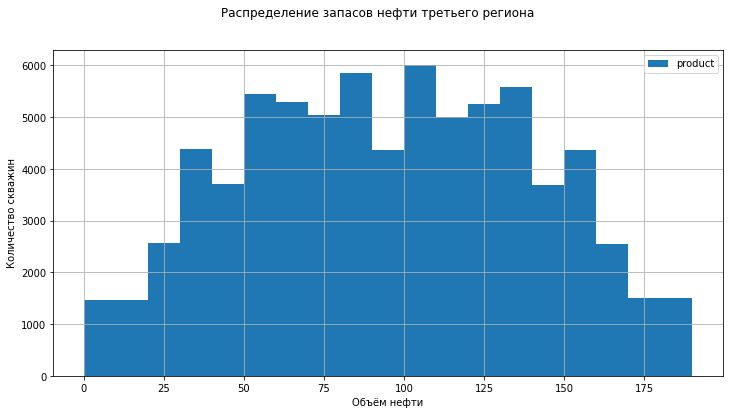

In [85]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=.25, random_state=32123)
fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
hist2 = target_train_2.hist(
    bins=19,
    legend=True
)
pl.suptitle("Распределение запасов нефти третьего региона")
hist2.set_xlabel("Объём нефти")
hist2.set_ylabel("Количество скважин")

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Изменён масштаб графика, добавлены подписи осей и название.
</div>

Объёмы нефти в скважинах третьего региона нормально распределены.

In [86]:
f"Среднее значение запаса нефти в скважине: {target_train_2.mean(): .3} тыс. баррелей"

'Среднее значение запаса нефти в скважине:  95.1 тыс. баррелей'

In [87]:
scaler = StandardScaler()
scaler.fit(features_train_2)
features_train_2 = pd.DataFrame(
    scaler.transform(features_train_2),
    columns=features_train_2.columns,
    index=features_train_2.index)
features_valid_2 = pd.DataFrame(
    scaler.transform(features_valid_2),
    columns=features_valid_2.columns,
    index=features_valid_2.index)

describe_dataframe(features_train_2)

,f0,f1,f2
id,,,
3qDeI,0.077896,0.111264,-1.244300
pAa2b,0.247590,0.304486,-0.124648
VQYfj,0.556312,-0.973663,-0.583083
EPmVj,0.902398,0.930041,1.658478
n1gVE,-1.569647,-0.892592,0.587865
Vje6p,-1.086760,-0.088092,-0.194370
HJuG3,-1.255595,0.115245,0.574214
qYLbZ,-0.625456,0.423360,0.265543
EBA2M,-1.371018,1.265440,-1.359392


<class 'pandas.core.frame.DataFrame'>
Index: 75000 entries, 3qDeI to OixjL
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f0      75000 non-null  float64
 1   f1      75000 non-null  float64
 2   f2      75000 non-null  float64
dtypes: float64(3)
memory usage: 2.3+ MB


None

,count,mean,std,min,50%,max
f0,75000.0,-5.115908e-18,1.000007,-5.052342,0.006086,4.176382
f1,75000.0,-6.536993e-18,1.000007,-4.097313,-0.004978,4.543278
f2,75000.0,4.732215e-17,1.000007,-4.066936,-0.003283,4.098144


Количество дублированных строк: 0


Данные нормализованы, не имеют пропусков и подготовлены для использования в обучении моделей.
В целом данных выглядят следующим образом: в среднем больше всего нефти в третьем и первом регионах, ожидаемо именно в них будут самые большие показатели доходности шахт (доходность будет определяться по предсказанным значениям, поэтому уверенности в этом нет). При этом во втором регионе много объёмных шахт, при условии, что будут отбирать только самые объемные месторождения, сразу списывать со счетов его не стоит.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Согласен, что колонка id нам не нужна.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Во всех графиках в проекте нужно подписать оси и названия, чтобы было понятно, что на нем визуализировано.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что scaler был обучен только на треине!
</div>

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Изменены масштабы графиков, добавлены подписи осей и названия графиков.
</div>

## Обучение и проверка модели

Так как требуется определить объём запасов нефти в скважине (количественный признак), то необходимо использовать модели RandomForest и LinearRegression. Найдем лучшие модели для каждого датасета, проверку будем проводить по метрике RMSE (корень квадратный из средней квадратичной ошибки), т.к. она подходит для задачи регрессии. Однако финальное сравнение стоит провести в конце работы при расчёте прибыли и рисков, т.к. именно это - цель данного проекта.

### Оценка адекватности моделей

Сперва оценим адекватность моделей. Рассчитаем среднее значение объема скважины (валидационных данных, т.к. на них проверяются модели) и посчитаем MSE.
Повторим для всех 3-х моделей.

In [88]:
predictions = pd.Series(target_valid_0.mean(), index=target_valid_0.index)
print("RMSE первой модели:", mean_squared_error(target_valid_0, predictions)**0.5)

RMSE первой модели: 44.442944498974654


In [89]:
predictions = pd.Series(target_valid_1.mean(), index=target_valid_1.index)
print("RMSE второй модели:", mean_squared_error(target_valid_1, predictions)**0.5)

RMSE второй модели: 46.10604333254927


In [90]:
predictions = pd.Series(target_valid_2.mean(), index=target_valid_2.index)
print("RMSE третьей модели:", mean_squared_error(target_valid_2, predictions)**0.5)

RMSE третьей модели: 44.778347592430094


### Обучение моделей первого региона

Обучим и проверим модель линейной регрессии для первого региона:

In [91]:
linear_model0 = LinearRegression()
linear_model0.fit(features_train_0, target_train_0)

LinearRegression()

In [92]:
linear_model0_predictions_valid = linear_model0.predict(features_valid_0)
linear_model0_result = mean_squared_error(target_valid_0, linear_model0_predictions_valid)**0.5
print(f"RMSE модели линейной регрессии на валидационной выборке первого региона: {linear_model0_result}")

RMSE модели линейной регрессии на валидационной выборке первого региона: 37.61902013878075


Найдем лучшую модель случайного леса для первого региона:

In [93]:
best_rf_model0_dt_model, best_rf_model0_predicted_valid = None, None
best_rf_model0_result, best_rf_model0_est, best_rf_model0_depth = 10000, 0, 0

In [94]:
for n_estimators in tqdm(range(10, 141, 10)):
    for depth in range (1, 14):
        rf_model0 = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=n_estimators)
        rf_model0.fit(features_train_0, target_train_0)
        rf_model0_predictions_valid = rf_model0.predict(features_valid_0)
        result = mean_squared_error(target_valid_0, rf_model0_predictions_valid)**0.5
        if result < best_rf_model0_result:
            best_rf_model0 = rf_model0
            best_rf_model0_result = result
            best_rf_model0_est = n_estimators
            best_rf_model0_depth = depth
            best_rf_model0_predicted_valid = rf_model0_predictions_valid

100%|██████████| 14/14 [25:29<00:00, 109.27s/it]


In [95]:
print(f"RMSE наилучшей модели случайного леса на валидационной выборке первого региона: {best_rf_model0_result}")

RMSE наилучшей модели случайного леса на валидационной выборке первого региона: 37.090735964043276


In [96]:
print(f"Среднее количество предсказанного сырья первого региона: "
      f"{best_rf_model0_predicted_valid.sum() / len(best_rf_model0_predicted_valid):.3}")

Среднее количество предсказанного сырья первого региона: 92.4


In [97]:
print(f"Глубина: {best_rf_model0_depth}, количество деревьев: {best_rf_model0_est} наилучшей модели случайного леса первого региона")

Глубина: 9, количество деревьев: 140 наилучшей модели случайного леса первого региона


### Обучение моделей второго региона

Обучим и проверим модель линейной регрессии для второго региона:

In [98]:
linear_model1 = LinearRegression()
linear_model1.fit(features_train_1, target_train_1)

LinearRegression()

In [99]:
linear_model1_predictions_valid = linear_model1.predict(features_valid_1)
linear_model1_result = mean_squared_error(target_valid_1, linear_model1_predictions_valid)**0.5
print(f"RMSE модели линейной регрессии на валидационной выборке второго региона: {linear_model1_result}")

RMSE модели линейной регрессии на валидационной выборке второго региона: 0.8937212510676176


Найдем лучшую модель случайного леса для второго региона:

In [100]:
best_rf_model1_dt_model, best_rf_model1_predicted_valid = None, None
best_rf_model1_result, best_rf_model1_est, best_rf_model1_depth = 10000, 0, 0

In [101]:
for n_estimators in tqdm(range(10, 141, 10)):
    for depth in range (1, 14):
        rf_model1 = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=n_estimators)
        rf_model1.fit(features_train_1, target_train_1)
        rf_model1_predictions_valid = rf_model1.predict(features_valid_1)
        result = mean_squared_error(target_valid_1, rf_model1_predictions_valid)**0.5
        if result < best_rf_model1_result:
            best_rf_model1 = rf_model1
            best_rf_model1_result = result
            best_rf_model1_est = n_estimators
            best_rf_model1_depth = depth
            best_rf_model1_predicted_valid = rf_model1_predictions_valid

100%|██████████| 14/14 [28:07<00:00, 120.51s/it]


In [102]:
print(f"RMSE наилучшей модели случайного леса на валидационной выборке: {best_rf_model1_result}")

RMSE наилучшей модели случайного леса на валидационной выборке: 0.7160936070080385


In [103]:
print(f"Среднее количество предсказанного сырья второго региона: "
      f"{best_rf_model1_predicted_valid.sum() / len(best_rf_model1_predicted_valid):.3}")

Среднее количество предсказанного сырья второго региона: 69.1


In [104]:
print(f"Глубина: {best_rf_model1_depth}, количество деревьев: {best_rf_model1_est} наилучшей модели случайного леса второго региона")

Глубина: 7, количество деревьев: 130 наилучшей модели случайного леса второго региона


### Обучение моделей третьего региона

Обучим и проверим модель линейной регрессии для третьего региона:

In [105]:
linear_model2 = LinearRegression()
linear_model2.fit(features_train_2, target_train_2)

LinearRegression()

In [106]:
linear_model2_predictions_valid = linear_model2.predict(features_valid_2)
linear_model2_result = mean_squared_error(target_valid_2, linear_model2_predictions_valid)**0.5
print(f"RMSE модели линейной регрессии на валидационной выборке третьего региона: {linear_model2_result}")

RMSE модели линейной регрессии на валидационной выборке третьего региона: 40.0289907015887


Найдем лучшую модель случайного леса для третьего региона:

In [107]:
best_rf_model2_dt_model, best_rf_model2_predicted_valid = None, None
best_rf_model2_result, best_rf_model2_est, best_rf_model2_depth = 10000, 0, 0

In [108]:
for n_estimators in tqdm(range(10, 141, 10)):
    for depth in range (1, 14):
        rf_model2 = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=n_estimators)
        rf_model2.fit(features_train_2, target_train_2)
        rf_model2_predictions_valid = rf_model2.predict(features_valid_2)
        result = mean_squared_error(target_valid_2, rf_model2_predictions_valid)**0.5
        if result < best_rf_model2_result:
            best_rf_model2 = rf_model2
            best_rf_model2_result = result
            best_rf_model2_est = n_estimators
            best_rf_model2_depth = depth
            best_rf_model2_predicted_valid = rf_model2_predictions_valid

100%|██████████| 14/14 [29:13<00:00, 125.26s/it]


In [109]:
print(f"RMSE наилучшей модели случайного леса на валидационной выборке третьего региона: {best_rf_model2_result}")

RMSE наилучшей модели случайного леса на валидационной выборке третьего региона: 37.585150191382425


In [110]:
print(f"Среднее количество предсказанного сырья третьего региона: "
      f"{best_rf_model2_predicted_valid.sum() / len(best_rf_model2_predicted_valid):.3}")

Среднее количество предсказанного сырья третьего региона: 94.7


In [111]:
print(f"Глубина: {best_rf_model2_depth}, количество деревьев: {best_rf_model2_est} наилучшей модели случайного леса третьего региона")

Глубина: 11, количество деревьев: 140 наилучшей модели случайного леса третьего региона


Данные второго региона распределены равномерно, данные первого и третьего регионов распределены нормально, поэтому средняя ошибка моделей гораздо выше.
Лучше всего показали себя модели для второго региона, проверим их далее при расчете прибыли.
Предсказания и правильные ответы на выборки были сохранены, все результаты продемонстрированы в ходе выполнения работы.
Хоть предсказания для первого и третьего регионов гораздо хуже предсказаний второго региона, но все-же RMSE в них ниже порога адекватности на 25-30%, это говорит о целесообразности использования данных моделей.
По средним показателям предсказанного сырья видно, что второй регион в среднем уступает по запасам нефти первому и третьему, его результат сильно хуже.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> На протяжении всего проекта происходит работа с 3мя одинаковыми таблицами. В связи с этим можно было использовать функции и/или циклы, чтобы избежать копирования кода.
<br> Зачем его нужно избегать? Потому что очень часто оно приводит к ошибкам (например, забыл поменять одну из переменных). Впоследствии такие ошибки очень трудно найти.
</div>

<div class="alert alert-block alert-warning", padding: 15px">
<strong>Комментарий студента:</strong>
    Да, была такая идея в начале работы с проектом.
    Но решил, что так будет нагляднее или для каждого датасета что-то изменится при правках и комментариях.
    Учту в последующей работе!
</div>

## Подготовка к расчёту прибыли

Для того чтобы скважины окупились, их запасы нефти должны превышать значение 111.1 тыс. баррелей.
Это число больше чем среднее значение любого региона. Это не страшно, так как будем выбирать самые объёмные из выборки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

In [118]:
BUDGET_PER_WELL = 10000000000

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [119]:
POINTS = 500
COUNT = 200

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [120]:
PROFIT_PER_BARREL = 450000

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Вероятность убытков - это процент убыточных скважин от общего их количества. Убыток — это отрицательная прибыль.

Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [121]:
BOOTSTRAP_SAMPLES = 1000

Доверительный интервал по условию = 95%

In [122]:
INTERVAL = .95

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

## Расчёт прибыли и рисков

Последовательность выполнения расчёта:
 1) Возьмем 500 точек из всей выборки
 2) Лучшей моделью предскажем объёмы нефти в них
 3) Посчитаем прибыль 200 самых объёмных предсказанных точек
 4) Повторим bootstrap_samples раз, запишем все результаты в один Series

Напишем функцию для расчета прибыли profit

In [127]:
def profit(target, predictions, count):
    chosen = predictions.sort_values("product", ascending=False)
    product = target.loc[chosen.index][:count].sum()
    return product * PROFIT_PER_BARREL - BUDGET_PER_WELL

Для генерации одинаковой случайной последовательности чисел используем метод RandomState

In [124]:
rand_st = np.random.RandomState(32123)

### Расчёт первого региона

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> В этом шаге, как и во всем проекте, можно использовать только линейную модель. Это требование заказчика.
    
В шаге с обучением моделей можно использовать случайный лес в исследовательских целях.
</div>

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Удалил исследования на моделях случайного леса.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Лучше заменить `.sample(frac=...)` на `.sample(n=...)`
</div>

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Заменил, как-то не догадался сам...
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для подсчета доверительного интервала стоит использовать метод квантилей, так как мы реализуем технику бутстрап.
</div>

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Реализовал метод квантилей для подсчета доверительного интервала.
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>
    
<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Поправил, так действительно нагляднее.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

#### Модель LinearRegression

In [128]:
profits0 = []
features, target, model = pd.concat([features_valid_0, features_train_0]), target_0, linear_model0
for i in tqdm(range(BOOTSTRAP_SAMPLES)):
    subsample = features.sample(n=POINTS, replace=True, random_state=rand_st)
    # subsample = features.sample(frac=(points / len(features)), replace=True, random_state=rand_st)
    predictions = pd.DataFrame(
        model.predict(subsample),
        columns=["product"],
        index=subsample.index)
    profits0.append(profit(
        target,
        predictions,
        COUNT)
    )

100%|██████████| 1000/1000 [00:07<00:00, 142.17it/s]


'Выборок с отрицательной прибылью: 52'

Text(0, 0.5, 'Количество выборок скважин')

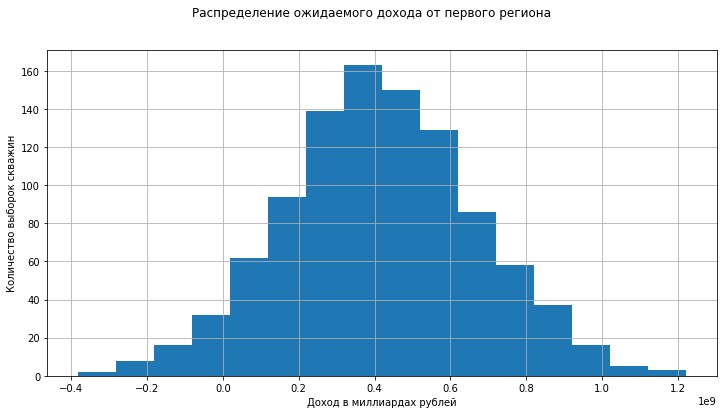

In [131]:
result = pd.Series(profits0)
display(f"Выборок с отрицательной прибылью: {(result < 0).sum()}")
# result.hist()

fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
result_hist0 = result.hist(
    bins=16,
)
pl.suptitle("Распределение ожидаемого дохода от первого региона")
result_hist0.set_xlabel("Доход в миллиардах рублей")
result_hist0.set_ylabel("Количество выборок скважин")

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Изменил масштаб графика, добавил подписи осей и название.
</div>

Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [134]:
linear0_mean_profit = result.mean()
display(f"Средняя прибыль: {linear0_mean_profit: .10}  рублей")

'Средняя прибыль:  415787404.3  рублей'

In [135]:
# linear0_min_edge, linear0_max_edge = st.t.interval(
#     interval, len(result)-1, linear0_mean_profit, result.sem()
# )
linear0_min_edge, linear0_max_edge = result.quantile(.025), result.quantile(.975)
print(f"95%-ый доверительный интервал: от {linear0_min_edge: .10}р. до {linear0_max_edge: .10}р.")

95%-ый доверительный интервал: от -86246676.41р. до  920171109.8р.


In [136]:
# display(f"Процент отрицательной прибыли: {len(result[result < 0]) / len(result): .1%}")
f"Процент отрицательной прибыли: {(result < 0).mean(): .1%}"

'Процент отрицательной прибыли:  5.2%'

### Расчёт второго региона

#### Модель LinearRegression

In [147]:
profits1 = []
features, target, model = pd.concat([features_valid_1, features_train_1]), target_1, linear_model1
for i in tqdm(range(BOOTSTRAP_SAMPLES)):
    subsample = features.sample(n=POINTS, replace=True, random_state=rand_st)
    # subsample = features.sample(frac=(points / len(features)), replace=False, random_state=rand_st)
    predictions = pd.DataFrame(
        model.predict(subsample),
        columns=["product"],
        index=subsample.index)
    profits1.append(profit(
        target,
        predictions,
        COUNT)
    )

100%|██████████| 1000/1000 [00:06<00:00, 143.56it/s]


'Выборок с отрицательной прибылью: 16'

Text(0, 0.5, 'Количество выборок скважин')

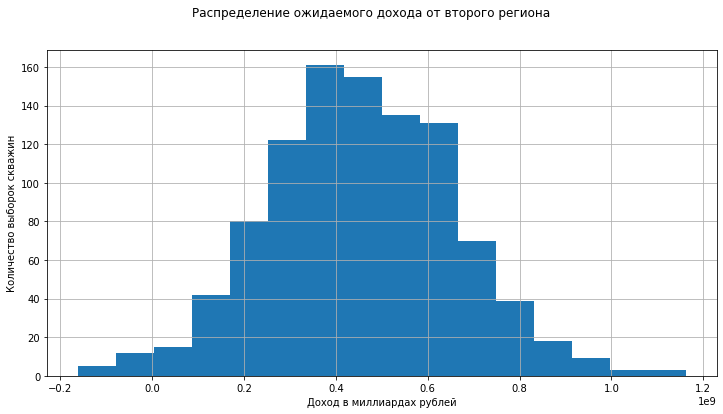

In [148]:
result = pd.Series(profits1)
display(f"Выборок с отрицательной прибылью: {(result < 0).sum()}")
# result.hist()

fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
result_hist1 = result.hist(
    bins=16,
)
pl.suptitle("Распределение ожидаемого дохода от второго региона")
result_hist1.set_xlabel("Доход в миллиардах рублей")
result_hist1.set_ylabel("Количество выборок скважин")

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Изменил масштаб графика, добавил подписи осей и название.
</div>

Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [149]:
linear1_mean_profit = result.mean()
display(f"Средняя прибыль: {linear1_mean_profit: .10}  рублей")

'Средняя прибыль:  454443335.7  рублей'

In [150]:
# linear1_min_edge, linear1_max_edge = st.t.interval(
#     interval, len(result)-1, linear1_mean_profit, result.sem()
# )
linear1_min_edge, linear1_max_edge = result.quantile(.025), result.quantile(.975)
print(f"95%-ый доверительный интервал: от {linear1_min_edge: .10}р. до {linear1_max_edge: .10}р.")

95%-ый доверительный интервал: от  30887787.27р. до  854404248.2р.


In [151]:
# display(f"Процент отрицательной прибыли: {len(result[result < 0]) / len(result): .1%}")
f"Процент отрицательной прибыли: {(result < 0).mean(): .1%}"

'Процент отрицательной прибыли:  1.6%'

### Расчёт третьего региона

#### Модель LinearRegression

In [152]:
profits2 = []
features, target, model = pd.concat([features_valid_2, features_train_2]), target_2, linear_model2
for i in tqdm(range(BOOTSTRAP_SAMPLES)):
    subsample = features.sample(n=POINTS, replace=True, random_state=rand_st)
    # subsample = features.sample(frac=(points / len(features)), replace=False, random_state=rand_st)
    predictions = pd.DataFrame(
        model.predict(subsample),
        columns=["product"],
        index=subsample.index)
    profits2.append(profit(
        target,
        predictions,
        COUNT)
    )

100%|██████████| 1000/1000 [00:08<00:00, 114.71it/s]


'Выборок с отрицательной прибылью: 77'

Text(0, 0.5, 'Количество выборок скважин')

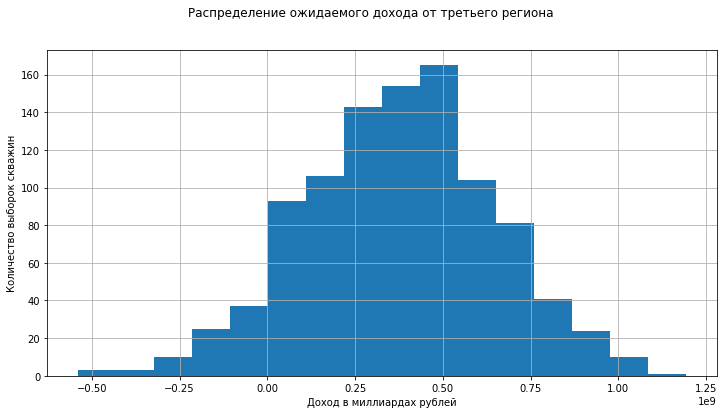

In [153]:
result = pd.Series(profits2)
display(f"Выборок с отрицательной прибылью: {(result < 0).sum()}")
# result.hist()

fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
result_hist1 = result.hist(
    bins=16,
)
pl.suptitle("Распределение ожидаемого дохода от третьего региона")
result_hist1.set_xlabel("Доход в миллиардах рублей")
result_hist1.set_ylabel("Количество выборок скважин")

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Изменил масштаб графика, добавил подписи осей и название.
</div>

Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [158]:
linear2_mean_profit = result.mean()
display(f"Средняя прибыль: {linear2_mean_profit: .10}  рублей")

'Средняя прибыль:  375511015.1  рублей'

In [159]:
# linear2_min_edge, linear2_max_edge = st.t.interval(
#     interval, len(result)-1, linear2_mean_profit, result.sem()
# )
linear2_min_edge, linear2_max_edge = result.quantile(.025), result.quantile(.975)
print(f"95%-ый доверительный интервал: от {linear2_min_edge: .10}р. до {linear2_max_edge: .10}р.")

95%-ый доверительный интервал: от -157393963.7р. до  887796804.1р.


In [160]:
# display(f"Процент отрицательной прибыли: {len(result[result < 0]) / len(result): .1%}")
f"Процент отрицательной прибыли: {(result < 0).mean(): .1%}"

'Процент отрицательной прибыли:  7.7%'

Вывод: Судя по результатам оценки модели линейной регрессии - наиболее прибыльные регионы это 2-й (454.5 млн. р.) и 1-й (415.8 млн. р.).
Так как по условию требуется отсеить те регионы, в которых риск убытков выше 5% - остается только 2-й регион.
Во 2-м регионе вероятность убытков всего 1.8%, а средний ожидаемый объем прибыли превышает остальные регионы.
Выбор падает на второй регион.

### Выводы

Для добывающей компании была обучена модель для выбора локации бурения скважины.
Для этого были исследованы 3 различных региона добычи, для каждого была обучена отдельная модель.
Перед исследованием была проведена работа над входными данными - разделение на выборки и последующая нормализация.
Далее были построены модели для предсказания объёма запасов в новых скважинах и на этих предсказаниях отобраны скважины с самыми высокими оценками значений. Затем уже был определён регион с максимальной суммарной прибылью отобранных скважин.

По предсказаниям наилучших моделей прибыль регионов такова:
1) 1-й регион:  415.8 млн. р. средней прибыли в интервале от -84 млн. р. до 920 млн. р. Процент отрицательной прибыли: 5.2%
2) 2-й регион:  433.6 млн. р. средней прибыли в интервале от 31 млн. р. до 854 млн. р. Процент отрицательной прибыли: 1.8%
3) 3-й регион:  375.9 млн. р. средней прибыли в интервале от -157 млн. р. до 888 млн. р. Процент отрицательной прибыли: 7.7%

В первом и третьем регионах вероятность убытков выше 5%, что по условиям заказчика недопустимо, поэтому данные регионы отпадают. По итогам исследования был выбран второй регион, как регион с самым высоким показателем средней ожидаемой прибыли и с самой низкой вероятностью убытков.

<div class="alert alert-block alert-warning">
<b>Исправлено:</b> Оба вывода переосмыслены в связи с правками.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Приятно видеть вывод в конце проекта! С выбором региона согласен.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован